#  Linear Regression

## Example 1

### Load Boston Dataset

- in the example, 80 percent of our dataset goes in training and 20 percent in test

In [24]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

X_train, X_test, Y_train, Y_test = train_test_split(boston.data,boston.target, test_size=0.2, random_state=0)
print(boston.data.shape,boston.target.shape)

(506, 13) (506,)


- We're going to train and fit the regressor in the training set and predict the target variable in the test dataset. We are then going to measure the accuracy of the regression task by using the MAE score.

## Linear Regression Train

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

print ("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 3.842810589450487


In [26]:
import timeit

%timeit regr.fit(X_train, Y_train)

789 µs ± 132 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Example 2

Text(0,0.5,'Weight')

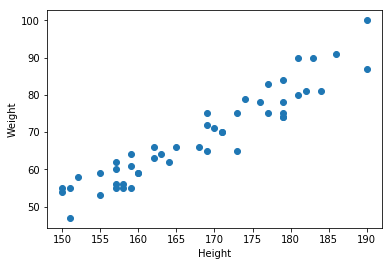

In [27]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

sl_data = pd.read_csv('../datasets/Mens_height_weight.csv')
fig, ax = plt.subplots(1, 1)
ax.scatter(sl_data['Height'],sl_data['Weight'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')


In [28]:
 sl_data.corr()

,Height,Weight
Height,1.000000,0.942603
Weight,0.942603,1.000000


### Create linear regression object

In [31]:
lm = LinearRegression()
lm.fit(sl_data.Height[:,np.newaxis], sl_data.Weight)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print ('Intercept is ' + str(lm.intercept_)  )


Intercept is -99.2772096062735


In [33]:
print('Coefficient value of the height is ' + str(lm.coef_) )


Coefficient value of the height is [1.00092142]


In [70]:
df_coefficients=pd.DataFrame(data=[[sl_data.columns.tolist()[0],lm.coef_[0]]],
              index=['0'],    
              columns=['Features', 'Estimated Coefficients']) 
df_coefficients

,Features,Estimated Coefficients
0,Height,1.000921


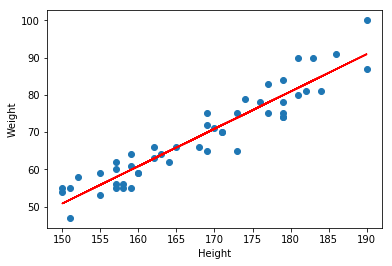

In [71]:
fig, ax = plt.subplots(1, 1)
ax.scatter(sl_data.Height,sl_data.Weight)
ax.plot(sl_data.Height,lm.predict(sl_data.Height[:, np.newaxis]),
color = 'red')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()

## Example 3

In [73]:
b_data = pd.read_csv('../datasets/basketball.csv')
b_data.describe()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


In [74]:
b_data.corr()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
height,1.000000,0.834324,0.495546,-0.259271,-0.068906
weight,0.834324,1.000000,0.516051,-0.290159,-0.009844
success_field_goals,0.495546,0.516051,1.000000,-0.018570,0.338760
success_free_throws,-0.259271,-0.290159,-0.018570,1.000000,0.244852
avg_points_scored,-0.068906,-0.009844,0.338760,0.244852,1.000000


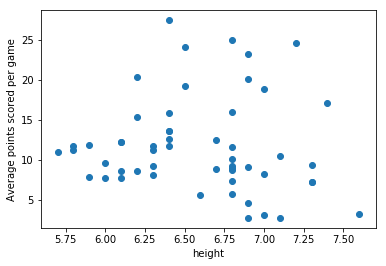

In [75]:
fig, ax = plt.subplots(1, 1)
ax.scatter(b_data.height, b_data.avg_points_scored)
ax.set_xlabel('height')
ax.set_ylabel('Average points scored per game')
plt.show()

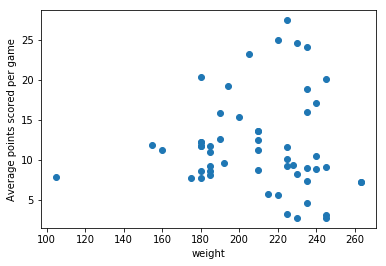

In [76]:
fig, ax = plt.subplots(1, 1)
ax.scatter(b_data.weight, b_data.avg_points_scored)
ax.set_xlabel('weight')
ax.set_ylabel('Average points scored per game')
plt.show()

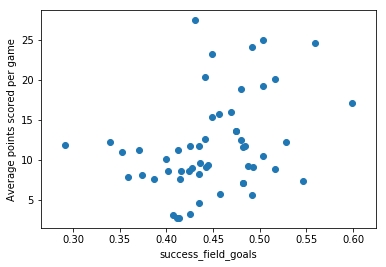

In [77]:
fig, ax = plt.subplots(1, 1)
ax.scatter(b_data.success_field_goals, b_data.avg_points_scored)
ax.set_xlabel('success_field_goals')
ax.set_ylabel('Average points scored per game')
plt.show()

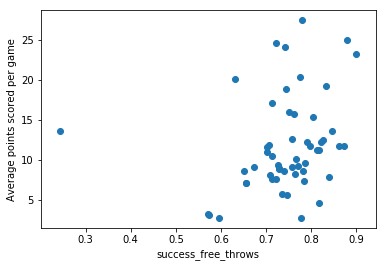

In [79]:
fig, ax = plt.subplots(1, 1)
ax.scatter(b_data.success_free_throws, b_data.avg_points_scored)
ax.set_xlabel('success_free_throws')
ax.set_ylabel('Average points scored per game')
plt.show()

### Training the model 

In [82]:
#from sklearn import linear_model,cross_validation, feature_selection,preprocessing

from sklearn.model_selection import train_test_split
'''
X_train, X_test, Y_train, Y_test = train_test_split(boston.data,boston.target, test_size=0.2, random_state=0)
print(boston.data.shape,boston.target.shape)
'''

from sklearn.cross_validation import cross_val_score, StratifiedKFold

import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

X = b_data.values.copy()
X_train, X_valid, y_train, y_valid = train_test_split( X[:, :-1],X[:, -1], test_size=0.2)

In [83]:
result = sm.OLS( y_train, add_constant(X_train) ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     3.032
Date:                Sat, 29 Jun 2019   Prob (F-statistic):             0.0290
Time:                        21:24:31   Log-Likelihood:                -129.39
No. Observations:                  43   AIC:                             268.8
Df Residuals:                      38   BIC:                             277.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9595     15.579      0.639      0.526     -21.578      41.497
x1            -4.4543      3.092     -1.441      0.158     -10.713       1.805
x2             0.0151      0.048      0.313      0.756      -0.083       0.113
x3            51.4407     16.815      3.059      0.004      17.401      85.480
x4             6.2866      8.151      0.771      0.445     -10.213      22.786
==============================================================================
Omnibus:                        9.821   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.016
Skew:                           1.010   Prob(JB):                       0.0110
Kurtosis:                       3.977   Cond. No.                     4.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Detail 

    From the preceding output, we can see that the R-square value is 0.265, which isn't great. We can see that the model shows x3 as the most significant variable, which is the success_field_goals variable. As a rule of thumb, any p value of a variable less than 0.05 can be considered significant

In [84]:
result_alternate = sm.OLS( y_train,add_constant(X_train[:,2]) ).fit()
result_alternate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.486
Date:                Sat, 29 Jun 2019   Prob (F-statistic):             0.0147
Time:                        21:27:03   Log-Likelihood:                -132.19
No. Observations:                  43   AIC:                             268.4
Df Residuals:                      41   BIC:                             271.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8068      6.476     -0.742      0.462     -17.885       8.271
x1            36.3130     14.259      2.547      0.015       7.517      65.109
==============================================================================
Omnibus:                        7.802   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.634
Skew:                           0.861   Prob(JB):                       0.0363
Kurtosis:                       3.857   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Detail 

    We can see that the variable has become less significant, and the r square value has become really low. The preceding model can be iterated multiple times with the different combination of variables till the best model is arrived at.

In [86]:
ypred = result.predict(add_constant(X_valid))
print (mse(ypred,y_valid))

38.00592254527575


In [87]:
ypred_alternate = result_alternate.predict(add_constant(X_valid[:,2]))
print ( mse(ypred_alternate,y_valid))

41.78107513658704


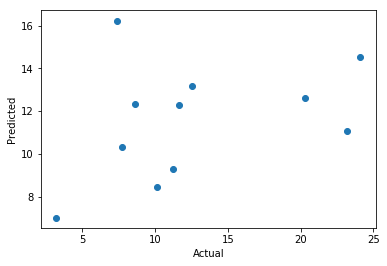

In [88]:
fig, ax = plt.subplots(1, 1)
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

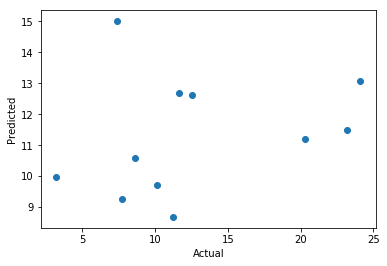

In [89]:
fig, ax = plt.subplots(1, 1)
ax.scatter(y_valid, ypred_alternate)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

## Create linear regression object

In [90]:
lm =LinearRegression()

In [97]:
lm.fit(X_train, y_train)
print ('Intercept is %f' % lm.intercept_)

print(['features','estimatedCoefficients'])
print(b_data.columns[0] , lm.coef_[0])

Intercept is 9.959490
['features', 'estimatedCoefficients']
height -4.4542861798480295


In [98]:
cross_val_score(lm, X_train,y_train, scoring='r2')

array([-0.66944121, -0.16613029, -0.40040532])

- Multiple runs of the cross-validation takes place and, by default, it is 3 due to which you can see three values in the preceding output. The highest value is of relevance and you can see that it is similar to the one we built with the statsmodels.

### Let's see how the mean squared error is calculated:

In [99]:
ypred = lm.predict(X_valid)
mean_squared_error(ypred,y_valid)


38.00592254527507

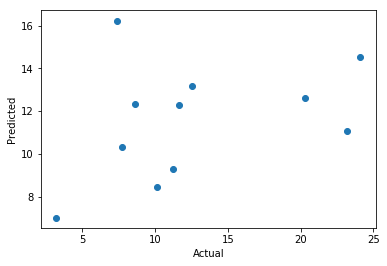

In [100]:
fig, ax = plt.subplots(1, 1)
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()